### Setting up the notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import iqr
from scipy.stats import pearsonr
import statsmodels as sm


### Importing data

In [2]:
salaries_data = pd.read_csv('salary.csv')
salaries_data=salaries_data.rename(columns={'male':'gender'})
dict_name={0:'woman',1:'man'}
salaries_data['gender']=salaries_data.gender.map(dict_name)
dict_name={1:'junior',2:'manager',3:'executive'}
salaries_data['position']=salaries_data.position.map(dict_name)
salaries_data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,gender,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,junior,man,3,0
1,58000.0,1,0,0,1.24,1,0,junior,man,2,0
2,45500.0,0,0,0,1.21,1,0,junior,man,3,2
3,35782.0,0,2,1,0.99,1,0,junior,man,4,1
4,34731.0,0,2,2,0.91,1,0,junior,man,4,1


In [3]:
salaries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null object
gender         514 non-null object
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 44.3+ KB


*There are 514 respondents who gave 11 features about their employment background.*

### Missing values

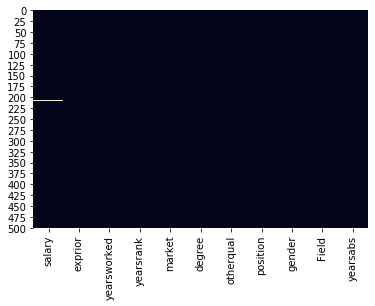

In [4]:
sns.heatmap(salaries_data.isnull(),cbar=False)

*From the above heatmap,the is only one column that has a missing value.*

#### Looking at the salary column

In [5]:
salaries_data['salary'].isnull()
missing_values=salaries_data[salaries_data.salary.isnull()==True]
salaries_data['salary']=salaries_data['salary'].fillna(salaries_data['salary'].mean())


*There is only one missing value of salary which is the 208th entry 
but all the other features about the employee are recorded which means it is viable 
 to keep the entry.The null value is now replaced by the mean annual salary.*

### Central tendency measures

In [14]:
salary_max=salaries_data['salary'].max()
salary_min=salaries_data['salary'].min()
print('The maximum salary is',salary_max)
print('The minimum salary is',salary_min)

The maximum salary is 96156.0
The minimum salary is 29000.0


*The minimum annual salary is 29000.0 dollars*
*The maximum annual salary is 96156.0 dollars*

In [15]:
salary_mean=salaries_data['salary'].mean()
sterror_mean=stats.sem(salaries_data['salary'])
salary_median=salaries_data['salary'].median()
IQR=iqr(salaries_data['salary'])
print('The mean salry is',salary_mean)
print('The mean standard error is',sterror_mean)
print('The salary median is',salary_median)
print('The interquartile range is',IQR)


The mean salry is 50863.22009783625
The mean standard error is 558.9715980665014
The salary median is 50165.5
The interquartile range is 20306.25


*The mean annual salary is 50863.22009783625 dollars.
The standard error mean is 558.9715980665014 dollars.
The salaries median is 50165.5 dollars.
The IQR is 20306.25 dollars.*

### Comparison of men and women

In [8]:
x=salaries_data['gender'].value_counts()
gender=pd.DataFrame(x)
gender


,gender
man,386
woman,128


In [16]:
woman_in_executive=len(salaries_data[(salaries_data.position=='executive')&(salaries_data.gender=='woman')])
men_in_executive=len(salaries_data[(salaries_data.position=='executive')&(salaries_data.gender=='man')])
print('Women in excecutive',woman_in_executive)
print('Men in executive',men_in_executive)

Women in excecutive 19
Men in executive 192


*There are 19 women in executive and 192 men in executive. It shows that there are more men in executive than women.*

### The distribution of salary brackets

#### Distribution plot

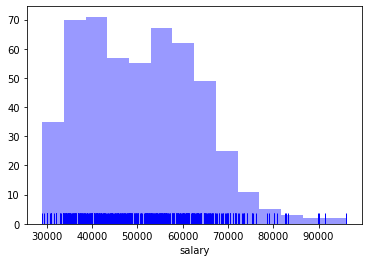

In [21]:

sns.distplot(salaries_data['salary'], kde=False, color='blue',rug=True)

*The data spread is from about 29000 dollars to 96156 dollars.
The salaries are mostly concentrated between 35000 dollars and 70000 dollars.
A distribution is positively skewed.The salaries fall toward the lower 
side of the scale and there are very few higher salaries.*

#### The histogram

(array([ 63., 102.,  82.,  83.,  87.,  56.,  28.,   7.,   2.,   4.]),
 array([29000. , 35715.6, 42431.2, 49146.8, 55862.4, 62578. , 69293.6,
        76009.2, 82724.8, 89440.4, 96156. ]),
 <a list of 10 Patch objects>)

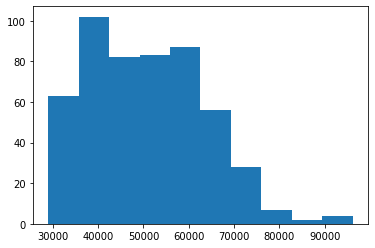

In [28]:
plt.hist(salaries_data.salary)


*The peak of salaries is between 37000 dollars and 43000 dollars.There are no outliers in this data.
This histogram simply shows that a lot of people earn between 37000 dollars and 43000 dollars. 
Then only a few earn between 83000 dollars and 89000 dollars.This few is most likey to be the excutive and 
a lot of people are holding junior positions.*

#### Average salaries of men and women

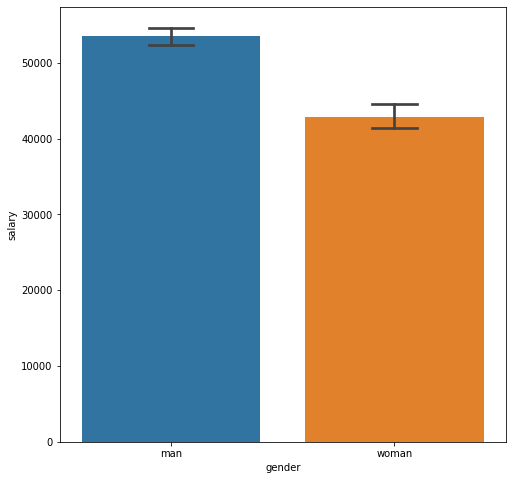

In [11]:
plt.figure(figsize=(8,8))
sns.barplot(salaries_data['gender'],salaries_data['salary'],capsize=0.2)

*The length of an Error Bar helps reveal the uncertainty of a data point.
    A short Error Bar shows that values are concentrated.In this case the men's salaries
    have a shorter error bar
    , signalling that the plotted average value is more likely, 
    while a long Error Bar which in this case is the error bar for women's salaries
    indicate that the values are more spread out and less reliable*

### The relationship between Years Worked and Salary

#### Scatter plot and line of best fit

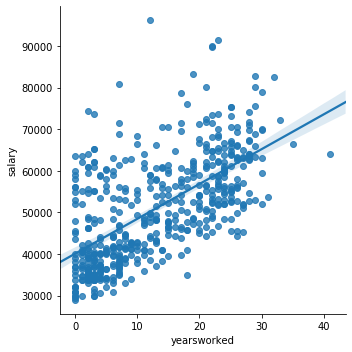

In [12]:
sns.lmplot(x='yearsworked',y='salary',data=salaries_data)

*The line of best fit shows a  strong relationship between years worked and the salary earned.*

#### Correlation

In [13]:
stats.pearsonr(salaries_data['yearsworked'],salaries_data['salary'])

(0.6231354820920547, 1.274779518969558e-56)

*Saying that the null hypothesis in this case is : 
    **The relationship between years worked and salary is not statistically significant**.*
    
*The correlation coefficient is 0.6231354820920547 
which shows a positive relationship between the years worked and slaries. 
The p-value is 1.274779518969558e-56 and p<0.005.
This implies that the correlation coefficient is statistically significant and thus rejecting the null hypothesis.
This is the range of values that contains with a 95% confidence the 'true' correlation coefficient.
This simply means that the more experienced an employer the higher their salary will be.*

